In [1]:
import pandas as pd
import numpy as np
#import sklearn as skl
import matplotlib as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import model_selection, linear_model, preprocessing, ensemble, metrics, svm
from sklearn.metrics import average_precision_score, roc_auc_score
from sklearn.utils import shuffle
from sklearn.model_selection import cross_validate, KFold, StratifiedKFold

#from sklearn.cross_validate import KFold
%pylab inline
#print (skl.__version__)

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plt', 'shuffle']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [2]:
train_data = pd.read_csv('train_Dataset.csv', sep =',')

In [3]:
train_data.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230,labels
0,NaN,NaN,NaN,NaN,NaN,1176.0,7.0,NaN,NaN,NaN,...,VjJAgOW,LM8l689qOp,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN,-1
1,NaN,NaN,NaN,NaN,NaN,1813.0,14.0,NaN,NaN,NaN,...,catzS2D,LM8l689qOp,NaN,ELof,3Cy4,ZI9m,ib5G6X1eUxUn6,mj86,NaN,-1
2,NaN,NaN,NaN,NaN,NaN,777.0,7.0,NaN,NaN,NaN,...,jjOYyXX,LM8l689qOp,NaN,NaN,Qu4f,RAYp,F2FyR07IdsN7I,NaN,NaN,-1
3,NaN,NaN,NaN,NaN,NaN,1554.0,7.0,NaN,NaN,NaN,...,MHP8mHO,LM8l689qOp,NaN,ELof,7P5s,nIGXDli,F2FyR07IdsN7I,mj86,NaN,1
4,NaN,NaN,NaN,NaN,NaN,980.0,0.0,NaN,NaN,NaN,...,C6OGkwT,LM8l689qOp,NaN,NaN,Xa3G,02N6s8f,xwM2aC7IdeMC0,NaN,NaN,-1


### 1. Преобразование данных перед работой с ними.

In [4]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler 
from imblearn.over_sampling import RandomOverSampler

In [5]:
#data_true = train_data[train_data['labels'] == 1]
#data_false = train_data[train_data['labels'] == -1]
X = train_data.iloc[:, 0:230].values
y = train_data.iloc[:, -1].values


In [6]:
#использую undersampling, чтобы сделать пропорцию классов 1:1:
os =  RandomUnderSampler(sampling_strategy='majority')
X_new, y_new = os.fit_resample(X, y)
x_data = pd.DataFrame(X_new, columns = ['Var1','Var2','Var3','Var4','Var5','Var6','Var7','Var8','Var9','Var10','Var11','Var12',
                                    'Var13','Var14','Var15','Var16','Var17','Var18','Var19','Var20','Var21','Var22','Var23',
                                    'Var24','Var25','Var26','Var27','Var28','Var29','Var30','Var31','Var32','Var33','Var34',
                                    'Var35','Var36','Var37','Var38','Var39','Var40','Var41','Var42','Var43','Var44','Var45',
                                    'Var46','Var47','Var48','Var49','Var50','Var51','Var52','Var53','Var54','Var55','Var56',
                                    'Var57','Var58','Var59','Var60','Var61','Var62','Var63','Var64','Var65','Var66','Var67',
                                    'Var68','Var69','Var70','Var71','Var72','Var73','Var74','Var75','Var76','Var77','Var78',
                                    'Var79','Var80','Var81','Var82','Var83','Var84','Var85','Var86','Var87','Var88','Var89',
                                    'Var90','Var91','Var92','Var93','Var94','Var95','Var96','Var97','Var98','Var99','Var100',
                                    'Var101','Var102','Var103','Var104','Var105','Var106','Var107','Var108','Var109','Var110',
                                    'Var111','Var112','Var113','Var114','Var115','Var116','Var117','Var118','Var119','Var120',
                                    'Var121','Var122','Var123','Var124','Var125','Var126','Var127','Var128','Var129','Var130',
                                    'Var131','Var132','Var133','Var134','Var135','Var136','Var137','Var138','Var139','Var140',
                                    'Var141','Var142','Var143','Var144','Var145','Var146','Var147','Var148','Var149','Var150',
                                    'Var151','Var152','Var153','Var154','Var155','Var156','Var157','Var158','Var159','Var160',
                                    'Var161','Var162','Var163','Var164','Var165','Var166','Var167','Var168','Var169','Var170',
                                    'Var171','Var172','Var173','Var174','Var175','Var176','Var177','Var178','Var179','Var180',
                                    'Var181','Var182','Var183','Var184','Var185','Var186','Var187','Var188','Var189','Var190',
                                    'Var191','Var192','Var193','Var194','Var195','Var196','Var197','Var198','Var199','Var200',
                                    'Var201','Var202','Var203','Var204','Var205','Var206','Var207','Var208','Var209','Var210',
                                    'Var211','Var212','Var213','Var214','Var215','Var216','Var217','Var218','Var219','Var220',
                                    'Var221','Var222','Var223','Var224','Var225','Var226','Var227','Var228','Var229','Var230'
                                           ])
y_data = pd.DataFrame(y_new, columns = ['labels'])
#new_train.insert(loc=230, column='labels', value=y_new)

In [7]:
# preprocessing.LabelEncoder для преобразования катагориальных переменных
def labelEncoder(data):
    #data = data.fillna(0)
    le = preprocessing.LabelEncoder()
    for m in range(190,230):
 #       data[cat]=data[cat].astype('category')
        le.fit(data.iloc[:,m])
        data.iloc[:,m] = le.transform(data.iloc[:,m])        
    return data
#используем labelEncoder, так как многие признаки имеют тысячи уникальных значений
x_data = labelEncoder(x_data)

In [8]:
#заменяю все пропуски на нули:
x_data = x_data.fillna(0)

In [9]:
x_data.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
0,0.0,0.0,0.0,0.0,0.0,973.0,7.0,0,0.0,0.0,...,6,225,0,1,1,22,1,24,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,...,4,1348,0,1,3,10,2,6,4,0
2,0.0,0.0,0.0,0.0,0.0,3416.0,14.0,0,0.0,0.0,...,4,656,0,1,0,9,2,6,4,0
3,0.0,0.0,0.0,0.0,0.0,1519.0,7.0,0,0.0,0.0,...,4,200,0,1,3,2,2,6,4,0
4,0.0,0.0,0.0,0.0,0.0,644.0,7.0,0,0.0,0.0,...,6,225,1,1,1,13,1,16,1,0


In [10]:
#наконец, данные готовы, можно приступать к построению моделей и оценке качества:

### 2. построение моделей и оценка качества.

In [11]:
# кросс-валидация ведется с помощью StratifiedKFold, количество фолдов - 5. ,а также подсчитывается f1 
def KFold(estimator, x_data, y_data):    
    skf = StratifiedKFold(n_splits=5) 
    y_scores = pd.DataFrame()
    y_tests = pd.DataFrame()
    y_pred = pd.DataFrame() 
    f1 = np.array([])
    n = 0
    for train_index, test_index in skf.split(x_data, y_data):
        estimator.fit(x_data.iloc[train_index, :], y_data.iloc[train_index, 0])
        y_scores['fold_'+str(n)] = estimator.decision_function(x_data.iloc[test_index, :])
        y_pred['fold_'+str(n)] = estimator.predict(x_data.iloc[test_index, :])
        y_tests['fold_'+str(n)] = y_data.iloc[test_index, 0].values
        f1 = np.append(f1, metrics.f1_score(y_data.iloc[test_index, 0], y_pred.iloc[:,n])) 
        n+=1
    print ('mean f1 : '+str(np.mean(f1)))
    return y_scores, y_tests

# кросс-валидация для алгоритмов, которые не могут предсказать вероятность. А также подсчитывается f1 
def KFoldOnlyF1Score(estimator, x_data, y_data):
    skf = StratifiedKFold(n_splits=5)
    y_pred = pd.DataFrame()
    f1 = np.array([])
    n = 0
    for train_index, test_index in skf.split(x_data, y_data):
        estimator.fit(x_data.iloc[train_index, :], y_data.iloc[train_index, 0])
        y_pred['fold_'+str(n)] = estimator.predict(x_data.iloc[test_index, :])
        f1 = np.append(f1, metrics.f1_score(y_data.iloc[test_index, 0], y_pred.iloc[:,n]))      
        n+=1
    return np.mean(f1)

# AUC_PRC        
def PRC(y_sores, y_tests):
    plt.figure(figsize = (7,7))
    mean_PR = np.array([])
    n = 0
    for i, j in zip(y_scores, y_tests):
        precision, recall, _ = metrics.precision_recall_curve(y_tests[i], y_scores[j])
        average_precision = metrics.average_precision_score(y_tests[i], y_scores[j])
        mean_PR = np.append(mean_PR, average_precision)
        plt.plot(recall, precision, color='b', alpha=0.5, label='PR fold '+str(n) + ' (score = %0.2f)' % average_precision)
        plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
        n+=1
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.legend(loc="upper right")
    plt.title('2-class Precision-Recall curve: Mean PR={0:0.3f}'.format(mean_PR.mean()))
    plt.show()
    
# AUC_ROC  
def ROC(y_scores, y_test):
    plt.figure(figsize = (7,7))
    Mean_ROC = np.array([])
    n = 0
    for i, j in zip(y_scores, y_tests):
        fpr, tpr, thresholds = metrics.roc_curve(y_tests[i], y_scores[j])
        roc_auc = metrics.auc(fpr, tpr)
        lw = 2
        Mean_ROC = np.append(Mean_ROC, roc_auc)
        plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC fold '+str(n)+' (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        n += 1
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.title('2-class ROC curve: Mean ROC area={0:0.3f}'.format(Mean_ROC.mean()))
    plt.show()

mean f1 : 0.6643111551505153


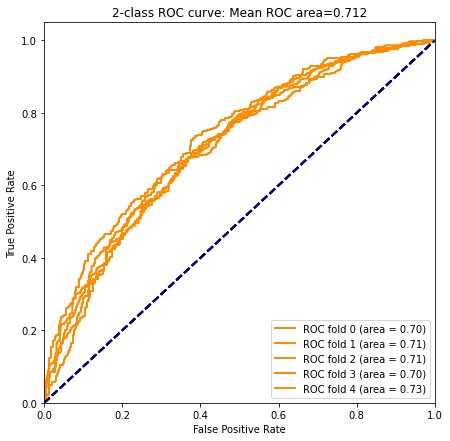

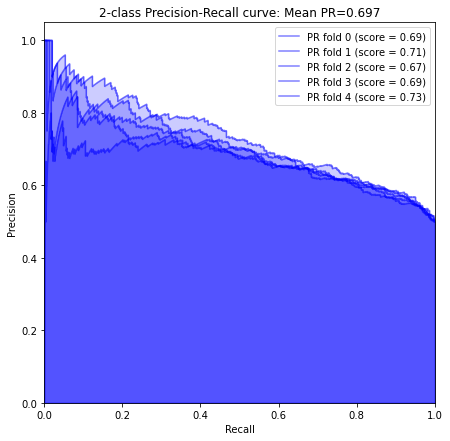

In [12]:
# градиентный бустинг
gradBoost = ensemble.GradientBoostingClassifier()
y_scores, y_tests = KFold(gradBoost, x_data, y_data)
ROC(y_scores, y_tests)
PRC(y_scores, y_tests)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.89002e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.87847e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.85145e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.47613e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


mean f1 : 0.6195684323106564


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.84762e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


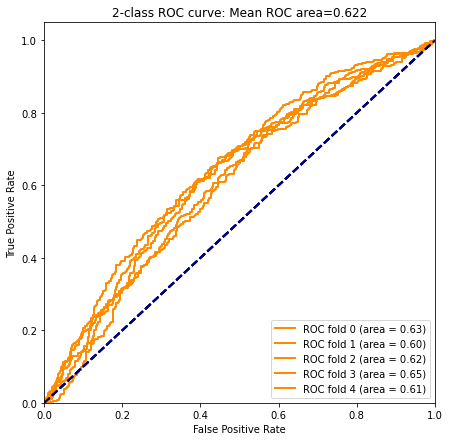

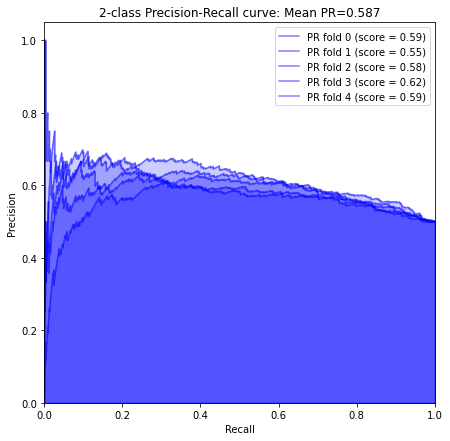

In [126]:
# Ridge:
ridge = linear_model.RidgeClassifier(random_state=2)
y_scores, y_tests = KFold(ridge, x_data, y_data)
ROC(y_scores, y_tests)
PRC(y_scores, y_tests)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

mean f1 : 0.5283173043955572


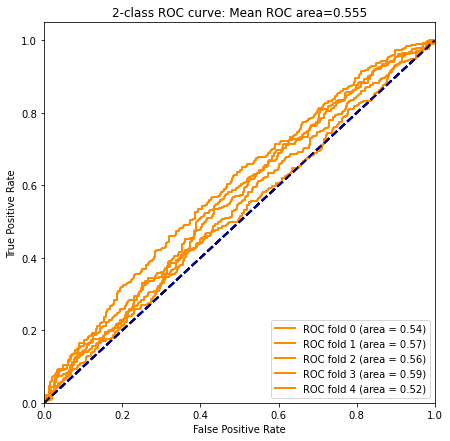

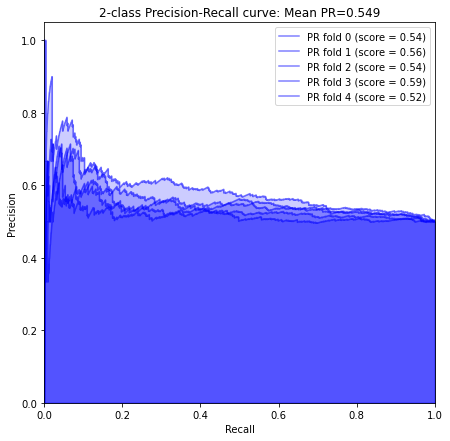

In [127]:
# LogisticRegression
logReg = linear_model.LogisticRegression()
y_scores, y_tests = KFold(logReg, x_data, y_data)
ROC(y_scores, y_tests)
PRC(y_scores, y_tests)
#Уже хуже результат

In [128]:
# RandomForest
# Подсчёт только для f1
RF = ensemble.RandomForestClassifier(n_estimators=100, max_depth=3)
print ('mean f1 score: '+ str(KFoldOnlyF1Score(RF, x_data, y_data)))

mean f1 score: 0.6412766416557776


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver termi

mean f1 : 0.508079254522648


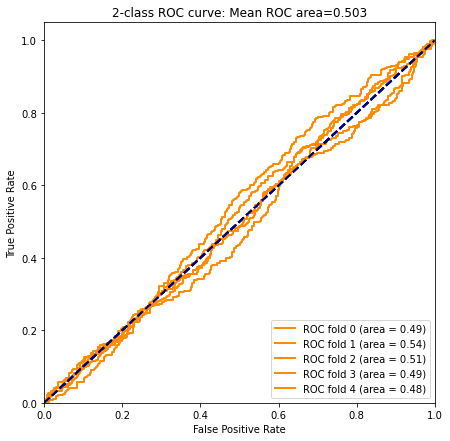

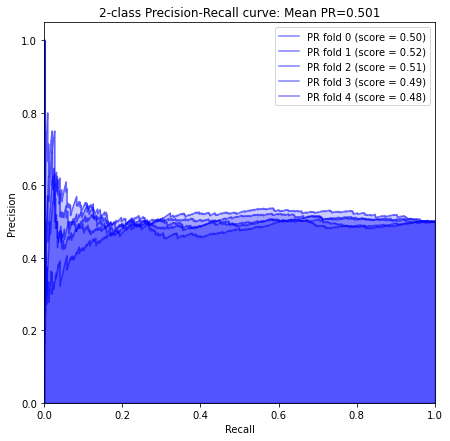

In [129]:
from sklearn.svm import SVC
clf = SVC(max_iter=10)
y_scores, y_tests = KFold(clf, x_data, y_data)
ROC(y_scores, y_tests)
PRC(y_scores, y_tests)
#Метод опорных векторов совсем слаб в данном случае...

#### Вывод: Из исследованных алгоритмов самыми оптимальными и годящимися являются градиентный бустинг и случайный лес.